# ***Notebook completamente desarrollado en Google Colab***

In [1]:
!pip install matplotlib

In [2]:
!pip install deap
!pip install pandas
#Installing necessary packages
!pip install mysql-connector-python
#Setting up MySQL on Colab
!apt-get -y install mysql-server
#Starting mysql server
!service mysql start
#Secure MySQL server
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 53.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-lite23
  liburi-perl mecab-ipadic mecab-ipadic-utf8 mecab-utils mysql-client-8.0 mysql-client-core-8.0
  mysql-server-8.0 mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libbusiness-isbn-perl libwww-perl mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl li

In [3]:
#Connect to MySQL
import mysql.connector

# Create a connection to the MySQL server
conn = mysql.connector.connect(user='root', password='root', host='localhost')
# Create a cursor to interact with the MySQL server
cursor = conn.cursor()

cursor.execute("DROP DATABASE IF EXISTS diet_db")
#Create a database and switch to it
# Create a new database named 'library'
cursor.execute("CREATE DATABASE IF NOT EXISTS diet_db")

# Switch to the 'library' database
cursor.execute("USE diet_db")

In [4]:
#It's possible that the table in colab already exists with the data and it doesn't get created again so some cells will fail
#Create table for recipes

cursor.execute("USE diet_db")

cursor.execute('''CREATE TABLE IF NOT EXISTS recipes (
    ID INT AUTO_INCREMENT PRIMARY KEY,
    Name VARCHAR(255) NOT NULL,
    Vegetarian BOOLEAN,
    Vegan BOOLEAN
)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS ingredients (
    ID INT AUTO_INCREMENT PRIMARY KEY,
    Name VARCHAR(255) NOT NULL,
    Vegetarian BOOLEAN,
    Vegan BOOLEAN)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS recipes_ingredients (
    ID INT AUTO_INCREMENT PRIMARY KEY,
    RECIPE_ID INT,
    INGREDIENT_ID INT,
    Quantity DECIMAL(10,2), -- Stored in grams
    Fat DECIMAL(10,2),
    Saturated_fat DECIMAL(10,2),
    Trans_fat DECIMAL(10,2),
    Cholesterol DECIMAL(10,2),
    Sodium DECIMAL(10,2),
    Carbohydrates DECIMAL(10,2),
    Protein DECIMAL(10,2),
    Calories DECIMAL(10,2),
    FOREIGN KEY (RECIPE_ID) REFERENCES recipes(ID),
    FOREIGN KEY (INGREDIENT_ID) REFERENCES ingredients(ID)
)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS allergens (
    ID INT AUTO_INCREMENT PRIMARY KEY,
    Name VARCHAR(255) NOT NULL
)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS recipes_allergens (
    ID INT AUTO_INCREMENT PRIMARY KEY,
    RECIPE_ID INT,
    ALLERGEN_ID INT,
    FOREIGN KEY (RECIPE_ID) REFERENCES recipes(ID),
    FOREIGN KEY (ALLERGEN_ID) REFERENCES allergens(ID))''')

conn.commit()

cursor.close()
conn.close()

In [5]:
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='diet_db')
# Create a cursor to interact with the MySQL server
cursor = conn.cursor()

cursor.execute('''INSERT INTO recipes (Name, Vegetarian, Vegan) VALUES
    ('Pork Tenderloin Wraps in Oriental Marinade', FALSE, FALSE),
    ('Lettuce Tacos with Prawns', FALSE, FALSE),
    ('Caramelized Pear and Blue Cheese Pizza', TRUE, FALSE),
    ('Zucchini Pouches Stuffed with Ricotta with Homemade Tomato Sauce and Couscous', TRUE, FALSE),
    ('Vegan Chicken Toasts with Grilled Zucchini Ricotta Base and Strawberry Jam', TRUE, TRUE),
    ('Smooth Zucchini Cream with Dill', TRUE, TRUE),
    ('Hake Shawarma with Ras-el-Hanout', FALSE, FALSE),
    ('Shredded Chicken with Homemade Tzatziki', FALSE, FALSE),
    ('Zucchini and Beef Lasagna', FALSE, FALSE),
    ('Hake with Homemade Zucchini Sauce', FALSE, FALSE),
    ('Pork Loin with Homemade Jus', FALSE, FALSE),
    ('Chicken in Homemade Greek Cheese Sauce', FALSE, FALSE),
    ('Veal Baguette with Homemade Rocket Pesto', FALSE, FALSE),
    ('Eggplant Parmigiana', TRUE, FALSE),
    ('Chicken with Ras-el-Hanout and Zucchini', FALSE, FALSE),
    ('Homemade Zucchini and Apple Cream', TRUE, TRUE),
    ('Gratinated Beans with Melted Mozzarella', TRUE, FALSE),
    ('Oven-Baked Sea Bass with Ratatouille', FALSE, FALSE),
    ('Herbed Couscous with Prawns', FALSE, FALSE),
    ('Seasoned Chicken Tacos with Homemade Corn Chips', FALSE, FALSE)''')

cursor.execute('''INSERT INTO ingredients (Name, Vegetarian, Vegan) VALUES
    ('Pork tenderloin', FALSE, FALSE),
     ('Ginger', TRUE, TRUE),
     ('Cilantro', TRUE, TRUE),
     ('Cucumber', TRUE, TRUE),
     ('Lima', TRUE, TRUE),
     ('Wheat tortilla', TRUE, TRUE),
     ('Carrot', TRUE, TRUE),
     ('Red Chili', TRUE, TRUE),
     ('Arugula', TRUE, TRUE),
     ('Lettuce', TRUE, TRUE),
     ('Quinoa', TRUE, TRUE),
     ('Prawns', FALSE, FALSE),
     ('Corn', TRUE, TRUE),
     ('Red Onion', TRUE, TRUE),
     ('Pizza base', TRUE, TRUE),
     ('Cream cheese', TRUE, FALSE),
     ('Nuts', TRUE, TRUE),
     ('Blue cheese', TRUE, FALSE),
     ('Pear', TRUE, TRUE),
     ('Zucchini', TRUE, TRUE),
     ('Crushed tomato', TRUE, TRUE),
     ('Couscous', TRUE, TRUE),
     ('Pecorino', TRUE, FALSE),
     ('Ricotta Cheese', TRUE, FALSE),
     ('Onion', TRUE, TRUE),
     ('Basil', TRUE, TRUE),
     ('Vegan Breaded Escalope', TRUE, TRUE),
     ('Strawberry Jam', TRUE, TRUE),
     ('Cabatta bread', TRUE, TRUE),
     ('Basil pesto', TRUE, TRUE),
     ('Leek', TRUE, TRUE),
     ('Dill', TRUE, TRUE),
     ('Hake', FALSE, FALSE),
     ('Pita bread', TRUE, TRUE),
     ('Tomato', TRUE, TRUE),
     ('Shallot', TRUE, TRUE),
     ('About Ras-el-Hanout', TRUE, TRUE),
     ('Greek yogurt', TRUE, FALSE),
     ('Lemon', TRUE, TRUE),
     ('Chicken breast', FALSE, FALSE),
     ('Mint', TRUE, TRUE),
     ('Vegetable broth', TRUE, TRUE),
     ('Bulgur', TRUE, TRUE),
     ('Middle Eastern Spice Blend', TRUE, TRUE),
     ('Grated cheese', TRUE, FALSE),
     ('Minced beef', FALSE, FALSE),
     ('Fried tomato', TRUE, TRUE),
     ('Basmati rice', TRUE, TRUE),
     ('On Italian Spices', TRUE, TRUE),
     ('Beef broth', FALSE, FALSE),
     ('Balsamic Vinegar', TRUE, TRUE),
     ('Pork loin', FALSE, FALSE),
     ('Portobello', TRUE, TRUE),
     ('Mustard', TRUE, TRUE),
     ('Potato', TRUE, TRUE),
     ('Greek cheese', TRUE, FALSE),
     ('Baguette', TRUE, TRUE),
     ('About Mayonnaise', TRUE, FALSE),
     ('Beef steak', FALSE, FALSE),
     ('Salted Peanuts', TRUE, TRUE),
     ('Eggplant', TRUE, TRUE),
     ('Grated Cured Italian Cheese', TRUE, FALSE),
     ('Mozzarella Cheese', TRUE, FALSE),
     ('Chicken broth', FALSE, FALSE),
     ('Parsley', TRUE, TRUE),
     ('Apple', TRUE, TRUE),
     ('Lentils', TRUE, TRUE),
     ('Crème Fraîche', TRUE, FALSE),
     ('About Nutmeg', TRUE, TRUE),
     ('White beans', TRUE, TRUE),
     ('Spinach Sprouts', TRUE, TRUE),
     ('Sea bass', FALSE, FALSE),
     ('Panko', TRUE, TRUE),
     ('Cherry tomato', TRUE, TRUE),
     ('Pumpkin Seeds', TRUE, TRUE),
     ('Corn tortilla', TRUE, TRUE),
     ('Chipotle Pasta', TRUE, TRUE),
     ('Mexican Spice Mix', TRUE, TRUE)''')

cursor.execute('''INSERT INTO recipes_ingredients (RECIPE_ID, INGREDIENT_ID, Quantity, Fat, Saturated_fat, Trans_fat, Cholesterol, Sodium, Carbohydrates, Protein, Calories) VALUES
        (1, 1, 250, 8.8, 2.9, 0.1, 1.625, 0.13, 0, 51.5, 300),
        (1, 2, 45, 0.3, 0.1, 0, 0, 0.059, 8, 0.8, 36),
        (1, 3, 50, 0.3, 0, 0, 0, 0.023, 1.8, 1.1, 11.5),
        (1, 4, 325, 0.4, 0.1, 0, 0, 0.0065, 11.8, 2.1, 49),
        (1, 5, 30, 0.1, 0, 0, 0, 0.0006, 3.2, 0.2, 9),
        (1, 6, 216, 16.4, 2.6, 0, 0, 1.6027, 106.5, 17.3, 641.5),
        (1, 7, 175, 0.4, 0.1, 0, 0, 0.1208, 16.8, 1.6, 71.9),
        (1, 8, 100, 0.4, 0, 0, 0, 0.009, 8.8, 1.9, 40),
        (1, 9, 50, 0.3, 0, 0, 0, 0.0135, 1.8, 1.3, 12.5),
        (2, 10, 220, 0.5, 0.1, 0, 0, 0.011, 4.9, 3, 28.6),
        (2, 11, 100, 6.1, 0.7, 0, 0, 5, 64.2, 14.1, 368),
        (2, 3, 75, 0.4, 0, 0, 0, 0.345, 2.8, 1.6, 17.3),
        (2, 12, 150, 1.5, 0.4, 0, 0.189, 0.849, 1.4, 20.4, 106.5),
        (2, 13, 140, 1.9, 0.5, 0, 0, 0.021, 26.2, 4.6, 120.4),
        (2, 5, 30, 0.1, 0, 0, 0, 0.0006, 3.2, 0.2, 9),
        (2, 14, 175, 0.2, 0.1, 0, 0, 0.007, 16.3, 1.9, 70),
        (3, 15, 150, 4.1, 0.8, 0, 0, 0.927, 72.2, 14.2, 388.5),
        (3, 16, 600, 206.4, 121.2, 7, 0.606, 1.884, 33.1, 36.9, 2100),
        (3, 17, 20, 13, 1.2, 0, 0, 0.0004, 2.7, 3, 130.8),
        (3, 18, 100, 28.7, 18.7, 0, 0.075, 1.15, 2.3, 21.4, 353),
        (3, 19, 190, 0.3, 0, 0, 0, 0.0019, 28.9, 0.7, 108.3),
        (4, 20, 250, 0.8, 0.2, 0, 0, 0.02, 7.8, 3, 42.5),
        (4, 21, 400, 1.1, 0.2, 0, 0, 0.744, 29.2, 6.6, 128),
        (4, 22, 150, 1, 0.2, 0, 0, 0.015, 116.1, 19.2, 564),
        (4, 23, 20, 5.4, 3.4, 0, 0.0208, 0.286, 0.7, 6.4, 77.4),
        (4, 24, 250, 25.5, 16.1, 0.8, 0.1225, 0.275, 18.2, 18.9, 375),
        (4, 25, 175, 0.2, 0.1, 0, 0, 0.007, 16.3, 1.9, 70),
        (4, 26, 40, 0.3, 0, 0, 0, 1.6, 1.1, 1.3, 9.2),
        (5, 6, 216, 16.4, 2.6, 0, 0, 1.6027, 106.5, 17.3, 641.5),
        (5, 24, 250, 25.5, 16.1, 0.8, 0.1225, 0.275, 18.2, 18.9, 375),
        (5, 27, 250, 0.2, 0.1, 0, 0.012, 0.196, 1.6, 6.1, 34.5),
        (5, 28, 50, 0, 0, 0, 0, 0.016, 34.5, 0.2, 139),
        (5, 20, 250, 0.8, 0.2, 0, 0, 0.02, 7.8, 3, 42.5),
        (6, 29, 120, 5.4, 0.8, 0, 0, 0.5676, 57, 12.8, 328.8),
        (6, 30, 15.7, 2.1, 0, 0, 0.039, 0.5, 3.9, 2.5, 166.3),
        (6, 20, 250, 0.8, 0.2, 0, 0, 0.02, 7.8, 3, 42.5),
        (6, 31, 140, 0.4, 0.1, 0, 0, 0.028, 19.9, 2.1, 85.4),
        (6, 32, 20, 0.2, 0, 0, 0, 0.0122, 1.4, 0.7, 8.6),
        (6, 16, 600, 206.4, 121.2, 7, 0.606, 1.884, 33.1, 36.9, 2100),
        (7, 33, 250, 1.3, 0.3, 0, 0.1075, 0.135, 0, 44.5, 205),
        (7, 34, 92, 1.6, 0.2, 0, 0, 0.3873, 51.4, 9, 241),
        (7, 4, 301, 0.3, 0.1, 0, 0, 0.006, 10.9, 2, 45.2),
        (7, 35, 123, 0.2, 0, 0, 0, 0.0062, 4.8, 1.1, 22.1),
        (7, 36, 59.1, 0.1, 0, 0, 0, 0.0071, 9.9, 1.5, 42.6),
        (7, 37, 4, 0.6, 0.1, 0, 0, 0.0021, 2.2, 0.6, 13),
        (7, 38, 227, 7.4, 4.8, 0, 0.0295, 0.1044, 10.6, 7.9, 138.5),
        (7, 39, 42, 0.1, 0, 0, 0, 0.0008, 3.9, 0.5, 12.2),
        (7, 9, 50, 0.3, 0, 0, 0, 0.0135, 1.8, 1.3, 12.5),
        (8, 40, 544, 14.3, 3.1, 0, 0.3971, 0.2448, 0, 122.4, 652.8),
        (8, 41, 100, 0.7, 0.2, 0, 0, 0.03, 8.4, 3.3, 44),
        (8, 42, 227, 0.1, 0, 0, 0, 0.0359, 0.3, 0.1, 2.2),
        (8, 43, 120, 1.6, 0.3, 0, 0, 0.0204, 91.1, 14.8, 410.4),
        (8, 38, 227, 7.4, 4.8, 0, 0.0295, 0.1044, 10.6, 7.9, 138.5),
        (8, 44, 2.7, 0.2, 0.1, 0, 0, 0.0015, 1.7, 0.2, 7.5),
        (8, 16, 600, 206.4, 121.2, 7, 0.606, 1.884, 33.1, 36.9, 2100),
        (8, 4, 301, 0.3, 0.1, 0, 0, 0.006, 10.9, 2, 45.2),
        (9, 20, 196, 0.6, 0.2, 0, 0, 0.0157, 6.1, 2.4, 33.3),
        (9, 25, 62.5, 0.1, 0, 0, 0, 0.0025, 5.8, 0.7, 25),
        (9, 45, 60, 20, 11.3, 0, 0.0594, 0.3918, 2, 13.7, 241.8),
        (9, 46, 250, 12, 5, 0.6, 0.1575, 0.1975, 0.3, 54, 325),
        (9, 7, 61, 0.1, 0, 0, 0, 0.0421, 5.8, 0.6, 25),
        (9, 47, 200, 0.4, 0.1, 0, 0, 0.01, 7.8, 1.8, 36),
        (10, 33, 250, 1.3, 0.3, 0, 0.1075, 0.135, 0, 44.5, 205),
        (10, 48, 150, 1, 0.3, 0, 0, 0.0075, 120, 10.7, 547.5),
        (10, 16, 600, 206.4, 121.2, 7, 0.606, 1.884, 33.1, 36.9, 2100),
        (10, 49, 2.7, 0.2, 0.1, 0, 0, 0.0015, 1.7, 0.2, 7.5),
        (10, 20, 196, 0.6, 0.2, 0, 0, 0.0157, 6.1, 2.4, 33.3),
        (10, 25, 62.5, 0.1, 0, 0, 0, 0.0025, 5.8, 0.7, 25),
        (10, 44, 2.7, 0.2, 0.1, 0, 0, 0.0015, 1.7, 0.2, 7.5),
        (11, 50, 150, 0.1, 0.1, 0, 0, 0.297, 1.8, 3, 19.5),
        (11, 51, 5, 0, 0, 0, 0, 0.0012, 0.9, 0, 4.4),
        (11, 52, 250, 31.5, 10.9, 0, 0.1575, 0.125, 0, 49.3, 495),
        (11, 53, 250, 0.9, 0, 0, 0, 0, 0.0225, 9.7, 5.3),
        (11, 54, 30, 1, 0.1, 0, 0, 0.330, 1.7, 1.1, 18),
        (11, 7, 61, 0.1, 0, 0, 0, 0.0421, 5.8, 0.6, 25),
        (11, 55, 400, 0.4, 0.1, 0, 0, 0.024, 70, 8.2, 308),
        (11, 36, 59.1, 0.1, 0, 0, 0, 0.071, 9.9, 1.5, 42.6),
        (12, 20, 196, 0.6, 0.2, 0, 0, 0.0157, 6.1, 2.4, 33.3),
        (12, 56, 100, 33.3, 18.9, 0, 0.0990, 0.653, 3.4, 22.9, 403),
        (12, 7, 61, 0.1, 0, 0, 0, 0.0421, 5.8, 0.6, 25),
        (12, 40, 544, 14.3, 3.1, 0, 0.3971, 0.2448, 0, 122.4, 652.8),
        (12, 16, 60, 20.6, 12.1, 0.7, 0.0606, 188.4, 3.3, 3.7, 210),
        (12, 42, 454, 0.2, 0, 0, 0, 0.0719, 0.7, 0.1, 4.4),
        (13, 57, 300, 7.3, 1.6, 0, 0, 1.806, 155.7, 32.4, 816),
        (13, 55, 200, 0.2, 0.1, 0, 0, 0.012, 35, 4.1, 154),
        (13, 23, 10, 2.7, 1.7, 0, 0.0104, 0.143, 0.4, 3.2, 38.7),
        (13, 58, 10, 7.7, 1.2, 0, 0.0039, 0.057, 0, 0, 69.2),
        (13, 16, 15, 5.2, 3, 0.2, 0.0152, 0.0471, 0.8, 0.9, 52.5),
        (13, 59, 125, 22.4, 9, 0, 0.1063, 0.0625, 0, 24.8, 307.5),
        (13, 9, 25, 0.2, 0, 0, 0, 0.0068, 0.9, 0.6, 6.3),
        (13, 60, 20, 9.9, 1.5, 0, 0, 0.082, 4.3, 4.9, 117.4),
        (13, 39, 21, 0.1, 0, 0, 0, 0.004, 2, 0.2, 6.1),
        (13, 26, 40, 0.3, 0, 0, 0, 1.6, 1.1, 1.3, 9.2),
        (14, 61, 548, 1, 0.2, 0, 0, 0.0011, 32.2, 5.4, 137),
        (14, 25, 62.5, 0.1, 0, 0, 0, 0.0025, 5.8, 0.7, 25),
        (14, 62, 40, 13.3, 7.6, 0, 0.0396, 0.2612, 1.3, 9.2, 161.2),
        (14, 29, 768, 34.8, 5.4, 0.3, 0, 3.6326, 0.3648, 82.2, 2104.3),
        (14, 51, 5, 0, 0, 0, 0, 0.0012, 0.9, 0, 4.4),
        (14, 26, 1, 0, 0, 0, 0, 0, 0, 0, 0.2),
        (14, 63, 125, 30.8, 19.5, 0, 0.1113, 0.8875, 3.1, 27, 397.5),
        (14, 21, 400, 1.1, 0.2, 0, 0, 0.744, 29.2, 6.6, 128),
        (14, 49, 2.7, 0.2, 0.1, 0, 0, 0.0015, 1.7, 0.2, 7.5 ),
        (15, 40, 544, 14.3, 3.1, 0, 0.3971, 0.2448, 0, 122.4, 652.8),
        (15, 48, 150, 1, 0.3, 0, 0, 0.0075, 120, 10.7, 547.5),
        (15, 39, 42, 0.1, 0, 0, 0, 0.0008, 3.9, 0.5, 12.2),
        (15, 20, 196, 0.6, 0.2, 0, 0, 0.0157, 6.1, 2.4, 33.3),
        (15, 37, 4, 0.6, 0.1, 0, 0, 0.0021, 2.2, 0.6, 13),
        (15, 64, 1200, 181.2, 51.7, 1.2, 0.9, 0.84, 0, 223.2, 2580),
        (15, 65, 0.2, 0, 0, 0, 0, 0.00001, 0, 0, 0.1),
        (15, 38, 227, 7.4, 4.8, 0, 0.0295, 0.1044, 10.6, 7.9, 138.5),
        (16, 66, 182, 0.3, 0.1, 0, 0, 0.0018, 25.1, 0.5, 94.6),
        (16, 67, 390, 4.1, 0.6, 0, 0, 0.00234, 247.3, 95.9, 1372.8),
        (16, 25, 62.5, 0.1, 0, 0, 0, 0.0025, 5.8, 0.7, 25),
        (16, 68, 200, 38.8, 20.2, 1.6, 0.118, 0.062, 9.3, 4.9, 396),
        (16, 20, 196, 0.6, 0.2, 0, 0, 0.0157, 6.1, 2.4, 33.3),
        (16, 31, 89, 0.3, 0, 0, 0, 0.0178, 12.6, 1.3, 54.3),
        (16, 42, 227, 0.1, 0, 0, 0, 0.0359, 0.3, 0.1, 2.2),
        (16, 69, 3, 1.1, 0.8, 0, 0, 0.0005, 1.5, 0.2, 15.8),
        (17, 70, 380, 3.2, 0.8, 0, 0, 0.0608, 229.1, 88.9, 1265.4),
        (17, 21, 200, 0.6, 0.1, 0, 0, 0.372, 14.6, 3.3, 64),
        (17, 25, 125, 0.1, 0.1, 0, 0, 0.005, 11.7, 1.4, 50),
        (17, 63, 125, 30.8, 19.5, 0, 0.1113, 0.8875, 3.1, 27, 397.5),
        (17, 51, 5, 0, 0, 0, 0, 0.0012, 0.9, 0, 4.4),
        (17, 71, 284, 1.1, 0.2, 0, 0, 0.2244, 10.3, 8.1, 65.4),
        (18, 72, 220, 5.1, 1.1, 0, 0.176, 0.1518, 0, 38.9, 213.4),
        (18, 20, 196, 0.6, 0.2, 0, 0, 0.0157, 6.1, 2.4, 33.3),
        (18, 61, 548, 1, 0.2, 0, 0, 0.0011, 32.2, 5.4, 137),
        (18, 36, 59.1, 0.1, 0, 0, 0, 0.071, 9.9, 1.5, 42.6),
        (18, 16, 30, 10.3, 6.1, 0.4, 0.0303, 0.0942, 1.7, 1.8, 105),
        (18, 35, 123, 0.2, 0, 0, 0, 0.0062, 4.8, 1.1, 22.1),
        (18, 25, 125, 0.1, 0.1, 0, 0, 0.005, 11.7, 1.4, 50),
        (18, 71, 284, 1.1, 0.2, 0, 0, 0.2244, 10.3, 8.1, 65.4),
        (18, 73, 25, 0.8, 0, 0, 0, 0.0358, 17.5, 2.4, 87.5),
        (19, 22, 150, 1, 0.2, 0, 0, 0.015, 116.1, 19.2, 564),
        (19, 74, 125, 0.3, 0, 0, 0, 0.063, 4.9, 1.1, 22.5),
        (19, 32, 1.2, 0, 0, 0, 0, 0.0007, 0.1, 0, 0.5),
        (19, 42, 227, 0.1, 0, 0, 0, 0.0359, 0.3, 0.1, 2.2),
        (19, 75, 20, 9.8, 1.7, 0, 0, 0.0014, 2.1, 6, 111.8),
        (19, 56, 100, 33.3, 18.9, 0, 0.0990, 0.653, 3.4, 22.9, 403),
        (19, 51, 5, 0, 0, 0, 0, 0.0012, 0.9, 0, 4.4),
        (19, 12, 150, 1.5, 0.4, 0, 0.189, 0.849, 1.4, 20.4, 106.5),
        (19, 26, 1, 0, 0, 0, 0, 0, 0, 0, 0.2),
        (20, 40, 544, 14.3, 3.1, 0, 0.3971, 0.2448, 0, 122.4, 652.8),
        (20, 76, 144, 4.1, 0.7, 0, 0, 0.0648, 64.2, 8.2, 313.9),
        (20, 77, 255.2, 3.9, 0.7, 0, 0, 0.0153, 190.6, 33.2, 946.6),
        (20, 35, 123, 0.2, 0, 0, 0, 0.0062, 4.8, 1.1, 22.1),
        (20, 25, 125, 0.1, 0.1, 0, 0, 0.005, 11.7, 1.4, 50),
        (20, 3, 0.2, 0, 0, 0, 0, 0.00001, 0, 0, 0),
        (20, 6, 294, 22.3, 3.6, 0, 0, 2.1815, 144.9, 23.5, 873.2),
        (20, 5, 67, 0.1, 0, 0, 0, 0.0013, 7, 0.5, 20.1),
        (20, 68, 200, 38.8, 20.2, 1.6, 0.118, 0.062, 9.3, 4.9, 396),
        (20, 78, 2.7, 0.2, 0.1, 0, 0, 0.0015, 1.7, 0.2, 7.5),
        (20, 16, 30, 10.3, 6.1, 0.4, 0.0303, 0.0942, 1.7, 1.8, 105)''')

cursor.execute('''INSERT INTO allergens (Name) VALUES
    ('Crustaceans'),
    ('Sulfites'),
    ('Milk'),
    ('Gluten'),
    ('Nuts'),
    ('Soy'),
    ('Celery'),
    ('Fish'),
    ('Sesame'),
    ('Mustard'),
    ('Egg'),
    ('Peanuts')''')

cursor.execute('''INSERT INTO recipes_allergens (RECIPE_ID, ALLERGEN_ID) VALUES
    (2, 1),
    (2, 2),
    (3, 3),
    (3, 4),
    (3, 5),
    (4, 4),
    (4, 3),
    (5, 4),
    (5, 3),
    (5, 6),
    (6, 4),
    (6, 5),
    (6, 3),
    (6, 2),
    (6, 7),
    (7, 8),
    (7, 4),
    (7, 3),
    (8, 7),
    (8, 4),
    (8, 3),
    (8, 9),
    (8, 10),
    (9, 3),
    (9, 2),
    (10, 8),
    (10, 3),
    (10, 9),
    (10, 10),
    (11, 2),
    (11, 10),
    (12, 7),
    (12, 3),
    (13, 4),
    (13, 3),
    (13, 10),
    (13, 11),
    (13, 12),
    (14, 3),
    (14, 4),
    (14, 2),
    (14, 3),
    (15, 3),
    (16, 7),
    (16, 3),
    (17, 2),
    (17, 3),
    (18, 8),
    (18, 3),
    (18, 4),
    (19, 4),
    (19, 7),
    (19, 3),
    (19, 2),
    (19, 1),
    (20, 4),
    (20, 2),
    (20, 6),
    (20, 3)''')

conn.commit()

cursor.close()
conn.close()

In [6]:
print("DATABASE LOADED")

DATABASE LOADED


In [7]:
#Query example
# Connect to the MySQL server and the 'recipes' database
conn = mysql.connector.connect(user='root', password='root', host='localhost')
cursor = conn.cursor(buffered=True)

cursor.execute("USE diet_db")
# Execute the SELECT query
cursor.execute('''SELECT * FROM ingredients''')


# Fetch all the results
records = cursor.fetchall()

# Print the records
for record in records:
  print(record)

cursor.close()
conn.close()

(1, 'Pork tenderloin', 0, 0)
(2, 'Ginger', 1, 1)
(3, 'Cilantro', 1, 1)
(4, 'Cucumber', 1, 1)
(5, 'Lima', 1, 1)
(6, 'Wheat tortilla', 1, 1)
(7, 'Carrot', 1, 1)
(8, 'Red Chili', 1, 1)
(9, 'Arugula', 1, 1)
(10, 'Lettuce', 1, 1)
(11, 'Quinoa', 1, 1)
(12, 'Prawns', 0, 0)
(13, 'Corn', 1, 1)
(14, 'Red Onion', 1, 1)
(15, 'Pizza base', 1, 1)
(16, 'Cream cheese', 1, 0)
(17, 'Nuts', 1, 1)
(18, 'Blue cheese', 1, 0)
(19, 'Pear', 1, 1)
(20, 'Zucchini', 1, 1)
(21, 'Crushed tomato', 1, 1)
(22, 'Couscous', 1, 1)
(23, 'Pecorino', 1, 0)
(24, 'Ricotta Cheese', 1, 0)
(25, 'Onion', 1, 1)
(26, 'Basil', 1, 1)
(27, 'Vegan Breaded Escalope', 1, 1)
(28, 'Strawberry Jam', 1, 1)
(29, 'Cabatta bread', 1, 1)
(30, 'Basil pesto', 1, 1)
(31, 'Leek', 1, 1)
(32, 'Dill', 1, 1)
(33, 'Hake', 0, 0)
(34, 'Pita bread', 1, 1)
(35, 'Tomato', 1, 1)
(36, 'Shallot', 1, 1)
(37, 'About Ras-el-Hanout', 1, 1)
(38, 'Greek yogurt', 1, 0)
(39, 'Lemon', 1, 1)
(40, 'Chicken breast', 0, 0)
(41, 'Mint', 1, 1)
(42, 'Vegetable broth', 1, 1)
(43

In [8]:
import json
import mysql.connector

In [9]:

import random
import pandas as pd
from pandas import DataFrame


In [10]:
# ** next to mydb like **mydb is for dictionary unpacking
conn = mysql.connector.connect(user='root', password='root', host='localhost')
cursor = conn.cursor()

cursor.execute("USE diet_db")

# Execute the SELECT query
cursor.execute('''SELECT * FROM recipes''')

# Fetch all the results from recipes table
df_recipes = DataFrame(cursor.fetchall(), columns=["id", "name", "Vegetarian", "Vegan"])

# Close the cursor and connection
cursor.close()
conn.close()

In [11]:
display(df_recipes)

,id,name,Vegetarian,Vegan
0,1,Pork Tenderloin Wraps in Oriental Marinade,0,0
1,2,Lettuce Tacos with Prawns,0,0
2,3,Caramelized Pear and Blue Cheese Pizza,1,0
3,4,Zucchini Pouches Stuffed with Ricotta with Hom...,1,0
4,5,Vegan Chicken Toasts with Grilled Zucchini Ric...,1,1
5,6,Smooth Zucchini Cream with Dill,1,1
6,7,Hake Shawarma with Ras-el-Hanout,0,0
7,8,Shredded Chicken with Homemade Tzatziki,0,0
8,9,Zucchini and Beef Lasagna,0,0
9,10,Hake with Homemade Zucchini Sauce,0,0


In [12]:
# ** next to mydb like **mydb is for dictionary unpacking
conn = mysql.connector.connect(user='root', password='root', host='localhost')
cursor = conn.cursor()

cursor.execute("USE diet_db")

# Execute the SELECT query
cursor.execute('''SELECT * FROM ingredients''')

# Fetch all the results from recipes table
df_ingredients = DataFrame(cursor.fetchall(), columns=["id", "name", "vegetarian", "vegan"])

# Close the cursor and connection
cursor.close()
conn.close()

In [13]:
df_ingredients

,id,name,vegetarian,vegan
0,1,Pork tenderloin,0,0
1,2,Ginger,1,1
2,3,Cilantro,1,1
3,4,Cucumber,1,1
4,5,Lima,1,1
...,...,...,...,...
73,74,Cherry tomato,1,1
74,75,Pumpkin Seeds,1,1
75,76,Corn tortilla,1,1
76,77,Chipotle Pasta,1,1


In [14]:
# ** next to mydb like **mydb is for dictionary unpacking
conn = mysql.connector.connect(user='root', password='root', host='localhost')
cursor = conn.cursor()

cursor.execute("USE diet_db")

# Execute the SELECT query
cursor.execute('''SELECT * FROM recipes_ingredients''')

# Fetch all the results from recipes table
df_recipes_ingredients = DataFrame(cursor.fetchall(), columns=["id", "recipe_id", "ingredient_id", "quantity", "fat", "saturated_fat", "trans_fat", "cholesterol", "sodium", "carbohydrates", "protein", "calories"])

# Close the cursor and connection
cursor.close()
conn.close()

In [15]:
df_recipes_ingredients.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             153 non-null    int64 
 1   recipe_id      153 non-null    int64 
 2   ingredient_id  153 non-null    int64 
 3   quantity       153 non-null    object
 4   fat            153 non-null    object
 5   saturated_fat  153 non-null    object
 6   trans_fat      153 non-null    object
 7   cholesterol    153 non-null    object
 8   sodium         153 non-null    object
 9   carbohydrates  153 non-null    object
 10  protein        153 non-null    object
 11  calories       153 non-null    object
dtypes: int64(3), object(9)
memory usage: 14.5+ KB


In [16]:
df_recipes_ingredients

,id,recipe_id,ingredient_id,quantity,fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,protein,calories
0,1,1,1,250.00,8.80,2.90,0.10,1.63,0.13,0.00,51.50,300.00
1,2,1,2,45.00,0.30,0.10,0.00,0.00,0.06,8.00,0.80,36.00
2,3,1,3,50.00,0.30,0.00,0.00,0.00,0.02,1.80,1.10,11.50
3,4,1,4,325.00,0.40,0.10,0.00,0.00,0.01,11.80,2.10,49.00
4,5,1,5,30.00,0.10,0.00,0.00,0.00,0.00,3.20,0.20,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...
148,149,20,6,294.00,22.30,3.60,0.00,0.00,2.18,144.90,23.50,873.20
149,150,20,5,67.00,0.10,0.00,0.00,0.00,0.00,7.00,0.50,20.10
150,151,20,68,200.00,38.80,20.20,1.60,0.12,0.06,9.30,4.90,396.00
151,152,20,78,2.70,0.20,0.10,0.00,0.00,0.00,1.70,0.20,7.50


In [17]:
# ** next to mydb like **mydb is for dictionary unpacking
conn = mysql.connector.connect(user='root', password='root', host='localhost')
cursor = conn.cursor()

cursor.execute("USE diet_db")

# Execute the SELECT query
cursor.execute('''SELECT * FROM allergens''')

# Fetch all the results from recipes table
df_allergens = DataFrame(cursor.fetchall(), columns=["id", "name"])

# Close the cursor and connection
cursor.close()
conn.close()

In [18]:
df_allergens

,id,name
0,1,Crustaceans
1,2,Sulfites
2,3,Milk
3,4,Gluten
4,5,Nuts
5,6,Soy
6,7,Celery
7,8,Fish
8,9,Sesame
9,10,Mustard


In [19]:

conn = mysql.connector.connect(user='root', password='root', host='localhost')
cursor = conn.cursor()

cursor.execute("USE diet_db")

# Execute the SELECT query
cursor.execute('''SELECT * FROM recipes_allergens''')

# Fetch all the results from recipes table
df_recipes_allergens = DataFrame(cursor.fetchall(), columns=["id", "recipe_id", "allergen_id"])

# Close the cursor and connection
cursor.close()
conn.close()

In [20]:
df_recipes_allergens

,id,recipe_id,allergen_id
0,1,2,1
1,2,2,2
2,3,3,3
3,4,3,4
4,5,3,5
5,6,4,4
6,7,4,3
7,8,5,4
8,9,5,3
9,10,5,6


Now that we have all the dataframes loaded with all the info we can start using the data

In [21]:
import pandas as pd
import numpy as np
import random
from deap import base
from deap import creator
from deap import tools

**We setup the goals**

In [22]:
# Optimizing the four components: calores, protein, fat and carbs
# goal percentages
tot_calories = 2300 * 7
percentage_prot = 0.5
percentage_carb = 0.3
percentage_fat = 0.2

# compute total calories per macro
cal_prot = round(percentage_prot * tot_calories)
cal_carb = round(percentage_carb * tot_calories)
cal_fat = round(percentage_fat * tot_calories)
print(cal_prot, cal_carb, cal_fat)

# fixed info on macro nutriments: calories per gram of protein, carb and fat
prot_cal_p_gram = 4
carb_cal_p_gram = 4
fat_cal_p_gram = 9

#goal grams
gram_prot = cal_prot / prot_cal_p_gram
gram_carb = cal_carb / carb_cal_p_gram
gram_fat = cal_fat / fat_cal_p_gram
print(gram_prot, gram_carb, gram_fat)

8050 4830 3220
2012.5 1207.5 357.77777777777777


In [23]:
# if we need to make everything as important, we should add a weight to them
# we know that there are 30% protein calories, 20% fat and 50% carbs.
weights = (-1., -1. / 0.3, -1. / 0.2, -1./0.5)

In [24]:
"""creator.create("FitnessMin", base.Fitness, weights=weights)
creator.create("Individual", list, fitness=creator.FitnessMin)"""

'creator.create("FitnessMin", base.Fitness, weights=weights)\ncreator.create("Individual", list, fitness=creator.FitnessMin)'

In [25]:
# extract the information of products in a format that is easier to use in the deap algorithms cost function

cal_data = list(df_recipes_ingredients['calories'])
prot_data = list(df_recipes_ingredients['protein'])
fat_data = list(df_recipes_ingredients['fat'])
carb_data = list(df_recipes_ingredients['carbohydrates'])
saturated_fat_data = list(df_recipes_ingredients['saturated_fat'])
trans_fat_data = list(df_recipes_ingredients['trans_fat'])
cholesterol_data = list(df_recipes_ingredients['cholesterol'])
sodium_data = list(df_recipes_ingredients['sodium'])








In [27]:

from decimal import Decimal
# this is the function used by the algorithm for evaluation
# I chose it to be the absolute difference of the number of calories in the planning and the goal of calories
# Function to calculate total nutrition

def calculate_total_nutrition(individual):
  #El problema esta en que siempre accede al mismo individuo y calcula sus macros, hay que recorrerlos--------------

  individual = individual[0]
  total_protein = sum(x * y for x, y in zip(prot_data, individual))
  total_fat = sum(x * y for x, y in zip(fat_data, individual))
  total_carb = sum(x * y for x, y in zip(carb_data, individual))
  total_calories = prot_cal_p_gram * total_protein + carb_cal_p_gram * total_carb + fat_cal_p_gram * total_fat

  total_saturated_fat = sum(x * y for x, y in zip(saturated_fat_data, individual))
  total_trans_fat = sum(x * y for x, y in zip(trans_fat_data, individual))
  total_cholesterol = sum(x * y for x, y in zip(cholesterol_data, individual))
  total_sodium = sum(x * y for x, y in zip(sodium_data, individual))

  total_nutrition = {
      'Calories': total_calories,
      'Protein': total_protein,
      'Fat': total_fat,
      'Carbohydrates': total_carb,
      'Saturated_Fat': total_saturated_fat,
      'Trans_Fat': total_trans_fat,
      'Cholesterol': total_cholesterol,
      'Sodium': total_sodium
  }
  return total_nutrition


In [28]:
# Updated fitness evaluation function
def evaluate(individual):
  #individual = individual[0]
  total_nutrition = calculate_total_nutrition(individual)
  fitness = 0

  target_ranges = {
      'Fat': (13, 27),
      'Saturated_Fat': (5, 7),
      'Trans_Fat': (0, 0.3),
      'Cholesterol': (0.05, 0.1),
      'Sodium': (0.5, 0.8),
      'Carbohydrates': (75, 108),
      'Protein': (15, 35),
      'Calories': (600, 700)
  }

  # Evaluate fitness based on the absolute difference from target ranges
  for nutrient, (min_val, max_val) in target_ranges.items():
      if total_nutrition[nutrient] < min_val:
          fitness += (float(min_val) - float(total_nutrition[nutrient])) ** 2
      elif total_nutrition[nutrient] > max_val:
          fitness += (float(total_nutrition[nutrient]) - float(max_val)) ** 2

  return fitness,

### **Dataframe used for the generation of solution**

In [30]:
#We could make a join of the tables so we can search later for the data we need in a more centralized place
# ** next to mydb like **mydb is for dictionary unpacking
conn = mysql.connector.connect(user='root', password='root', host='localhost')
cursor = conn.cursor()

cursor.execute("USE diet_db")
# Execute the SELECT query
cursor.execute('''SELECT recipes.name as recipe_name, recipes.ID as recipe_id, ingredients.name as ingredient_name, ingredients.ID as
ingredient_id, recipes_ingredients.Quantity, recipes_ingredients.Fat, recipes_ingredients.Carbohydrates, recipes_ingredients.Protein,
recipes_ingredients.Calories, allergens.Name as allergen, allergens.id as allergen_id, recipes.Vegetarian, recipes.Vegan FROM recipes
INNER JOIN recipes_ingredients ON recipes.ID = recipes_ingredients.RECIPE_ID INNER JOIN
ingredients ON ingredients.ID = recipes_ingredients.INGREDIENT_ID INNER JOIN recipes_allergens ON recipes.ID = recipes_allergens.RECIPE_ID
INNER JOIN allergens ON allergens.ID = recipes_allergens.ALLERGEN_ID''')

# Fetch all the results from the query
data = cursor.fetchall()

# Get column names from the cursor description
columns = [col[0] for col in cursor.description]

# Fetch all the results from recipes table
df_recipes_join_all = DataFrame(data, columns=columns)

# Close the cursor and connection
cursor.close()
conn.close()

In [31]:
df_recipes_join_all

,recipe_name,recipe_id,ingredient_name,ingredient_id,Quantity,Fat,Carbohydrates,Protein,Calories,allergen,allergen_id,Vegetarian,Vegan
0,Lettuce Tacos with Prawns,2,Lettuce,10,220.00,0.50,4.90,3.00,28.60,Sulfites,2,0,0
1,Lettuce Tacos with Prawns,2,Lettuce,10,220.00,0.50,4.90,3.00,28.60,Crustaceans,1,0,0
2,Lettuce Tacos with Prawns,2,Quinoa,11,100.00,6.10,64.20,14.10,368.00,Sulfites,2,0,0
3,Lettuce Tacos with Prawns,2,Quinoa,11,100.00,6.10,64.20,14.10,368.00,Crustaceans,1,0,0
4,Lettuce Tacos with Prawns,2,Cilantro,3,75.00,0.40,2.80,1.60,17.30,Sulfites,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Seasoned Chicken Tacos with Homemade Corn Chips,20,Mexican Spice Mix,78,2.70,0.20,1.70,0.20,7.50,Gluten,4,0,0
457,Seasoned Chicken Tacos with Homemade Corn Chips,20,Cream cheese,16,30.00,10.30,1.70,1.80,105.00,Milk,3,0,0
458,Seasoned Chicken Tacos with Homemade Corn Chips,20,Cream cheese,16,30.00,10.30,1.70,1.80,105.00,Soy,6,0,0
459,Seasoned Chicken Tacos with Homemade Corn Chips,20,Cream cheese,16,30.00,10.30,1.70,1.80,105.00,Sulfites,2,0,0


In [32]:
df_recipes_join_all.loc[df_recipes_join_all['ingredient_name'] == 'Beef steak']

,recipe_name,recipe_id,ingredient_name,ingredient_id,Quantity,Fat,Carbohydrates,Protein,Calories,allergen,allergen_id,Vegetarian,Vegan
248,Veal Baguette with Homemade Rocket Pesto,13,Beef steak,59,125.00,22.40,0.00,24.80,307.50,Peanuts,12,0,0
249,Veal Baguette with Homemade Rocket Pesto,13,Beef steak,59,125.00,22.40,0.00,24.80,307.50,Egg,11,0,0
250,Veal Baguette with Homemade Rocket Pesto,13,Beef steak,59,125.00,22.40,0.00,24.80,307.50,Mustard,10,0,0
251,Veal Baguette with Homemade Rocket Pesto,13,Beef steak,59,125.00,22.40,0.00,24.80,307.50,Milk,3,0,0
252,Veal Baguette with Homemade Rocket Pesto,13,Beef steak,59,125.00,22.40,0.00,24.80,307.50,Gluten,4,0,0


# **FILTERING BEFORE WE GENERATE THE SOLUTIONS, BASED ON PREFERENCES AND ALLERGENS**

## Take in account that based on the database data, putting preferences and allergens can limit the data a lot and also the fitness final value. Which can mean we could get worse results because of preferences

In [33]:
allergens = list(df_allergens['name'])
allergens

['Crustaceans',
 'Sulfites',
 'Milk',
 'Gluten',
 'Nuts',
 'Soy',
 'Celery',
 'Fish',
 'Sesame',
 'Mustard',
 'Egg',
 'Peanuts']

In [34]:
#Some filtering before generating a population based on the preference and allergens, like Vegetarian preference and only showing the recipes that are Vegetarian

vegetarian = 0
vegan = 0

#my_allergen = ['Milk', 'Soy']
my_allergen = []

#If is vegetarian we filter vegetarian recipes and also filter based on the allergen, we can find in the my_allergen list
if vegetarian == 1:
  df_recipes_join_all = df_recipes_join_all.loc[df_recipes_join_all['Vegetarian'] == 1]
  if my_allergen:
    df_recipes_join_all = df_recipes_join_all.loc[-df_recipes_join_all['allergen'].isin(my_allergen)]
  else:
    df_recipes_join_all
#We do the same with vegan
elif vegan == 1:
  df_recipes_join_all = df_recipes_join_all.loc[df_recipes_join_all['Vegan'] == 1]
  if my_allergen:
    df_recipes_join_all = df_recipes_join_all.loc[-df_recipes_join_all['allergen'].isin(my_allergen)]
  else:
    df_recipes_join_all
#And if we don't have any preference for vegetarian or vegan, we just look at the allergens
elif my_allergen:
  df_recipes_join_all = df_recipes_join_all.loc[-df_recipes_join_all['allergen'].isin(my_allergen)]
else:
  df_recipes_join_all

df_recipes_join_all



,recipe_name,recipe_id,ingredient_name,ingredient_id,Quantity,Fat,Carbohydrates,Protein,Calories,allergen,allergen_id,Vegetarian,Vegan
0,Lettuce Tacos with Prawns,2,Lettuce,10,220.00,0.50,4.90,3.00,28.60,Sulfites,2,0,0
1,Lettuce Tacos with Prawns,2,Lettuce,10,220.00,0.50,4.90,3.00,28.60,Crustaceans,1,0,0
2,Lettuce Tacos with Prawns,2,Quinoa,11,100.00,6.10,64.20,14.10,368.00,Sulfites,2,0,0
3,Lettuce Tacos with Prawns,2,Quinoa,11,100.00,6.10,64.20,14.10,368.00,Crustaceans,1,0,0
4,Lettuce Tacos with Prawns,2,Cilantro,3,75.00,0.40,2.80,1.60,17.30,Sulfites,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Seasoned Chicken Tacos with Homemade Corn Chips,20,Mexican Spice Mix,78,2.70,0.20,1.70,0.20,7.50,Gluten,4,0,0
457,Seasoned Chicken Tacos with Homemade Corn Chips,20,Cream cheese,16,30.00,10.30,1.70,1.80,105.00,Milk,3,0,0
458,Seasoned Chicken Tacos with Homemade Corn Chips,20,Cream cheese,16,30.00,10.30,1.70,1.80,105.00,Soy,6,0,0
459,Seasoned Chicken Tacos with Homemade Corn Chips,20,Cream cheese,16,30.00,10.30,1.70,1.80,105.00,Sulfites,2,0,0


In [35]:
#Just to see recipes without duplicates
#df_recipes_join_all.loc[df_recipes_join_all['Vegetarian'] == 1].drop_duplicates(subset=['recipe_name'])
df_list_recipes = df_recipes_join_all.drop_duplicates(subset=['recipe_name'])
df_list_recipes

,recipe_name,recipe_id,ingredient_name,ingredient_id,Quantity,Fat,Carbohydrates,Protein,Calories,allergen,allergen_id,Vegetarian,Vegan
0,Lettuce Tacos with Prawns,2,Lettuce,10,220.00,0.50,4.90,3.00,28.60,Sulfites,2,0,0
14,Caramelized Pear and Blue Cheese Pizza,3,Pizza base,15,150.00,4.10,72.20,14.20,388.50,Nuts,5,1,0
29,Zucchini Pouches Stuffed with Ricotta with Hom...,4,Zucchini,20,250.00,0.80,7.80,3.00,42.50,Milk,3,1,0
43,Vegan Chicken Toasts with Grilled Zucchini Ric...,5,Wheat tortilla,6,216.00,16.40,106.50,17.30,641.50,Soy,6,1,1
58,Smooth Zucchini Cream with Dill,6,Cabatta bread,29,120.00,5.40,57.00,12.80,328.80,Celery,7,1,1
88,Hake Shawarma with Ras-el-Hanout,7,Hake,33,250.00,1.30,0.00,44.50,205.00,Milk,3,0,0
115,Shredded Chicken with Homemade Tzatziki,8,Chicken breast,40,544.00,14.30,0.00,122.40,652.80,Mustard,10,0,0
155,Zucchini and Beef Lasagna,9,Zucchini,20,196.00,0.60,6.10,2.40,33.30,Sulfites,2,0,0
167,Hake with Homemade Zucchini Sauce,10,Hake,33,250.00,1.30,0.00,44.50,205.00,Mustard,10,0,0
195,Pork Loin with Homemade Jus,11,Beef broth,50,150.00,0.10,1.80,3.00,19.50,Mustard,10,0,0


In [36]:
# the random initialization of the genetic algorithm is done here
# we can make it so it can choose between 0 and 1 to generate later the population
# 0: ingredient not used
# 1: ingredient used
# The ideal would be to generate 10 lists of 78 elements but just filling 14 random positions (average number of ingredients)
# with 1's so it will reflect
# the ingredients used from the whole list. We don't want just any random number of 1's on a list, and if we make it lower
# than the 78 ingredients from the database, we won't know at all which ingredients are being used since the positions from the generated
# lists won't match the positions of the ingredient list


def recipes_ingredients_random(df_recipes_join_all):
    lists = []
    all_ingredient_ids = df_recipes_join_all['ingredient_id'].unique().tolist()

    for _ in range(10):  # Number of individuals
        lst = [0] * 78  # Initialize a list of 78 zeros
        selected_ingredients = random.sample(all_ingredient_ids, 14)  # Randomly select 14 unique ingredient IDs

        for ingredient_id in selected_ingredients:
            lst[ingredient_id - 1] = 1  # Set the selected positions to 1
        lists.append(lst)

    return lists

In [37]:
# Another issue we face here is that when we cross two recipes, we need to assure that we will still have k ingredients
# and no less or more than k. If we cross two lists of 78 elements, with 14 1's each of them, we do not want an offspring
# of 78 elements but has 7 1's only, reflecting just 7 ingredients. So we'll define a custom crossover function:

# Define the custom crossover operator
import random

def crossover(parent1, parent2):
    # Assuming parent1 and parent2 are lists of binary values (0s and 1s)
    offspring1 = parent1[:]
    offspring2 = parent2[:]

    # Perform crossover operation (you can customize this as needed)
    crossover_point = random.randint(1, len(parent1) - 1)
    offspring1[crossover_point:], offspring2[crossover_point:] = parent2[crossover_point:], parent1[crossover_point:]

    # Ensure offspring1 has exactly 14 ones
    offspring1_ones = sum(offspring1)
    if offspring1_ones != 14:
        ones_indices = [i for i, val in enumerate(offspring1) if val == 1]
        zeros_indices = [i for i, val in enumerate(offspring1) if val == 0]

        if offspring1_ones > 14:
            ones_to_remove = random.sample(ones_indices, offspring1_ones - 14)
            for idx in ones_to_remove:
                offspring1[idx] = 0
        else:
            zeros_to_add = random.sample(zeros_indices, 14 - offspring1_ones)
            for idx in zeros_to_add:
                offspring1[idx] = 1

    # Ensure offspring2 has exactly 14 ones
    offspring2_ones = sum(offspring2)
    if offspring2_ones != 14:
        ones_indices = [i for i, val in enumerate(offspring2) if val == 1]
        zeros_indices = [i for i, val in enumerate(offspring2) if val == 0]

        if offspring2_ones > 14:
            ones_to_remove = random.sample(ones_indices, min(len(ones_indices), offspring2_ones - 14))
            for idx in ones_to_remove:
                offspring2[idx] = 0
        else:
            zeros_to_add = random.sample(zeros_indices, min(len(zeros_indices), 14 - offspring2_ones))
            for idx in zeros_to_add:
                offspring2[idx] = 1

    return offspring1, offspring2



In [38]:
# Since mutation from Deap doesn't put up with constraints it doesn't care about
# how many 1's we want which are 14. The crossover works with it but the mutation can
# mess it up

def custom_mutate(individual, indpb):

    ones_indices = [i for i, val in enumerate(individual[0]) if val == 1]
    zeros_indices = [i for i, val in enumerate(individual[0]) if val == 0]

    for i in range(len(individual)):
        if random.random() < indpb:
            if individual[i] == 1 and len(ones_indices) > 14:
                individual[i] = 0
                ones_indices.remove(i)
                zeros_indices.append(i)
            elif individual[i] == 0 and len(ones_indices) < 14:
                individual[i] = 1
                zeros_indices.remove(i)
                ones_indices.append(i)

    return individual,


In [39]:


# this is the setup of the deap library: registering the different function into the toolbox
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("recipes_ingredients_random", recipes_ingredients_random, df_recipes_join_all)

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.recipes_ingredients_random, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
# Register the custom mutation function in the toolbox
toolbox.register("mutate", custom_mutate, indpb=0.05)
toolbox.register("crossover", crossover)

We make a population of 70
[[[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 1

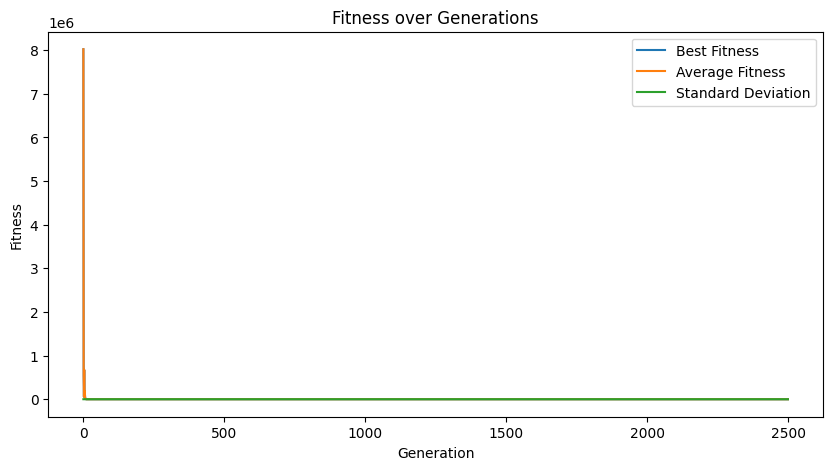

In [40]:
# this is the definition of the total genetic algorithm is executed, it is almost literally copied from the deap library

import numpy as np
import matplotlib.pyplot as plt

def main():
    n = 70
    pop = toolbox.population(n)
    print(f"We make a population of {n}")
    print(pop)
    #pop = pop[0]
    # Initialize lists to store metrics
    best_fitness = []
    mean_fitness = []
    std_deviation = []

    # Evaluate the initial population
    #fitnesses = list(map(toolbox.evaluate, pop))
    fitnesses = list(map(toolbox.evaluate, pop[0]))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    CXPB, MUTPB = 0.5, 0.2
    g = 0  # Generation counter

    while g < 2500:  # Number of generations
        g += 1
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                child1[0][0], child2[0][0] = crossover(child1[0][0], child2[0][0])  # Custom crossover
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant[0])
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, [ind[0] for ind in invalid_ind]))
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring
        fits = [ind.fitness.values for ind in pop]

        # Compute statistics
        best_fitness.append(np.min(fits[0]))
        mean_fitness.append(np.mean(fits[0]))
        std_deviation.append(np.std(fits[0]))

    print("Final generation's best fitness:", best_fitness[-1])
    print("Final generation's average fitness:", mean_fitness[-1])
    print("Final generation's fitness standard deviation:", std_deviation[-1])

    #best = pop[np.argmin([toolbox.evaluate(x) for x in pop])]
    top_10_indices = np.argsort([ind.fitness.values[0] for ind in pop])[:10]
    top_10_individuals = [pop[i] for i in top_10_indices]
    print(top_10_individuals)
    #We get the macros of each generated individual
    final_nutrition_data = [calculate_total_nutrition(x) for x in top_10_individuals[0]]
    for idx, (ind, nutrition_data) in enumerate(zip(top_10_individuals, final_nutrition_data)):
        print(f"Recipe {idx + 1} (Individual {top_10_indices[idx] + 1}): {nutrition_data}")

    # Store binary recipes in a DataFrame
    binary_recipes = [ind for ind in top_10_individuals[0]]
    generated_recipes_df = pd.DataFrame(binary_recipes)

    return generated_recipes_df, best_fitness, mean_fitness, std_deviation, final_nutrition_data

generated_recipes_df, best_fitness, mean_fitness, std_deviation, final_nutrition_data = main()

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(best_fitness, label='Best Fitness')
plt.plot(mean_fitness, label='Average Fitness')
plt.plot(std_deviation, label='Standard Deviation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness over Generations')
plt.legend()
plt.show()




In [41]:

final_nutrition_data

[{'Calories': Decimal('684.70'),
  'Protein': Decimal('33.70'),
  'Fat': Decimal('22.30'),
  'Carbohydrates': Decimal('87.30'),
  'Saturated_Fat': Decimal('5.40'),
  'Trans_Fat': Decimal('0.00'),
  'Cholesterol': Decimal('0.03'),
  'Sodium': Decimal('1.34')}]

In [42]:
generated_recipes_df

,0,1,2,3,4,5,6,7,8,9
0,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [43]:
#We see there's 78 ingredients
df_ingredients

,id,name,vegetarian,vegan
0,1,Pork tenderloin,0,0
1,2,Ginger,1,1
2,3,Cilantro,1,1
3,4,Cucumber,1,1
4,5,Lima,1,1
...,...,...,...,...
73,74,Cherry tomato,1,1
74,75,Pumpkin Seeds,1,1
75,76,Corn tortilla,1,1
76,77,Chipotle Pasta,1,1


In [44]:
generated_recipes_df

,0,1,2,3,4,5,6,7,8,9
0,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [45]:
import pandas as pd

def extract_binary_arrays(df):
    # Explode the lists in each column into separate rows
    extracted_df = pd.DataFrame({col: pd.Series(df[col][0]) for col in df.columns})
    extracted_df.index = [f"{i+1}" for i in range(len(extracted_df))]

    # Rename columns to recipe_1, recipe_2, etc.
    extracted_df.columns = [f"recipe_{i+1}" for i in range(len(extracted_df.columns))]

    return extracted_df

# Example usage (assuming your DataFrame is named 'generated_recipes_df'):
extracted_df = extract_binary_arrays(generated_recipes_df)
print(extracted_df)



    recipe_1  recipe_2  recipe_3  recipe_4  recipe_5  recipe_6  recipe_7  \
1          0         0         0         0         0         0         0   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          1         0         0         0         0         0         1   
5          1         0         0         0         0         0         0   
..       ...       ...       ...       ...       ...       ...       ...   
74         0         0         0         0         0         0         0   
75         0         0         1         0         0         0         0   
76         0         0         0         0         0         0         0   
77         1         0         0         1         0         0         0   
78         0         0         0         0         0         0         0   

    recipe_8  recipe_9  recipe_10  
1          0         0          0  
2          0   

In [46]:
display(extracted_df)

,recipe_1,recipe_2,recipe_3,recipe_4,recipe_5,recipe_6,recipe_7,recipe_8,recipe_9,recipe_10
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,1,0,1
5,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0
75,0,0,1,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0
77,1,0,0,1,0,0,0,0,1,1


In [47]:
result_df = pd.concat([df_ingredients, extracted_df.reset_index(drop=True)], axis=1)


In [48]:
display(result_df)

,id,name,vegetarian,vegan,recipe_1,recipe_2,recipe_3,recipe_4,recipe_5,recipe_6,recipe_7,recipe_8,recipe_9,recipe_10
0,1,Pork tenderloin,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Ginger,1,1,0,0,0,0,0,0,0,0,0,0
2,3,Cilantro,1,1,0,0,0,0,0,0,0,0,1,0
3,4,Cucumber,1,1,1,0,0,0,0,0,1,1,0,1
4,5,Lima,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,Cherry tomato,1,1,0,0,0,0,0,0,0,0,0,0
74,75,Pumpkin Seeds,1,1,0,0,1,0,0,0,0,0,0,0
75,76,Corn tortilla,1,1,0,0,0,0,0,0,0,0,0,0
76,77,Chipotle Pasta,1,1,1,0,0,1,0,0,0,0,1,1


In [49]:
#Filter to get all ingredients like a list
result_df1 = result_df[result_df["recipe_1"].astype(str).str.contains('1')][['name']]
result_df2 = result_df[result_df["recipe_2"].astype(str).str.contains('1')][['name']]
result_df3 = result_df[result_df["recipe_3"].astype(str).str.contains('1')][['name']]
result_df4 = result_df[result_df["recipe_4"].astype(str).str.contains('1')][['name']]
result_df5 = result_df[result_df["recipe_5"].astype(str).str.contains('1')][['name']]
result_df6 = result_df[result_df["recipe_6"].astype(str).str.contains('1')][['name']]
result_df7 = result_df[result_df["recipe_7"].astype(str).str.contains('1')][['name']]
result_df8 = result_df[result_df["recipe_8"].astype(str).str.contains('1')][['name']]
result_df9 = result_df[result_df["recipe_9"].astype(str).str.contains('1')][['name']]
result_df10 = result_df[result_df["recipe_10"].astype(str).str.contains('1')][['name']]

In [50]:
result_df2


,name
6,Carrot
10,Quinoa
11,Prawns
17,Blue cheese
32,Hake
36,About Ras-el-Hanout
41,Vegetable broth
47,Basmati rice
54,Potato
56,Baguette


In [51]:
import requests



In [52]:
ingredients = result_df1["name"].tolist()

In [58]:
ingredients

['Cucumber',
 'Lima',
 'Arugula',
 'Lettuce',
 'Pear',
 'Pecorino',
 'Onion',
 'Leek',
 'Vegetable broth',
 'Grated cheese',
 'Mustard',
 'About Mayonnaise',
 'Spinach Sprouts',
 'Chipotle Pasta']

In [96]:
import requests
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time
# Function to search for recipes on EDAMAM
def recipe_search(ingredient, vegan=False, vegetarian=False, allergens=[]):
    app_id = '667c1d62'  # Replace with your Edamam API app ID
    app_key = '2a2586b6dc9514f4de7703f5a77ffb25'  # Replace with your Edamam API app key
    diet = []

    if vegan:
        diet.append("vegan")
    if vegetarian:
        diet.append("vegetarian")

    # Join diet constraints
    diet_query = "&".join([f"health={d}" for d in diet])

    # Join allergen constraints
    allergen_query = "&".join([f"health={a}" for a in allergens])

    # Build query
    query = f'https://api.edamam.com/search?q={ingredient}&app_id={app_id}&app_key={app_key}'
    if diet_query:
        query += f'&{diet_query}'
    if allergen_query:
        query += f'&{allergen_query}'

    result = requests.get(query)
    time.sleep(10)

    # Check for HTTP errors
    result.raise_for_status()

    data = result.json()

    # Handle potential absence of 'hits' key
    if 'hits' in data:
        return data['hits']
    else:
        print("Error: 'hits' key not found in API response. Check API response for details.")
        # You might want to log the entire response for debugging:
        print(data)
        return [] # Return an empty list to avoid further errors


In [97]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_ingredients(recipe):
    return [ingredient['food'] for ingredient in recipe['ingredients']]

def extract_macros(recipe):
    return {
        'calories': recipe['calories'],
        'fat': recipe['totalNutrients']['FAT']['quantity'],
        'carbs': recipe['totalNutrients']['CHOCDF']['quantity'],
        'protein': recipe['totalNutrients']['PROCNT']['quantity']
    }

def ingredient_similarity(original_ingredients, edamam_ingredients):
    # Convert lists to sets
    original_set = set(original_ingredients)
    edamam_set = set(edamam_ingredients)
    # Calculate Jaccard similarity
    intersection = original_set.intersection(edamam_set)
    union = original_set.union(edamam_set)
    return len(intersection) / len(union)

def macro_distance(original_macros, edamam_macros):
    # Convert macros to numpy arrays
    original_vector = np.array(list(original_macros.values()))
    edamam_vector = np.array(list(edamam_macros.values()))
    # Calculate cosine similarity
    similarity = cosine_similarity([original_vector], [edamam_vector])
    return similarity[0][0]


In [98]:
def find_closest_recipe(original_recipe, vegan=False, vegetarian=False, allergens=[]):

   # Extract original recipe ingredients and macros
  original_ingredients = [item['name'] for item in original_recipe['ingredients']]
  original_macros = extract_macros(original_recipe)

  closest_recipe = None
  best_combined_score = -1

  for ingredient in original_ingredients:
      results = recipe_search(ingredient, vegan=vegan, vegetarian=vegetarian, allergens=allergens)

      for result in results:
          edamam_recipe = result['recipe']
          edamam_ingredients = extract_ingredients(edamam_recipe)
          edamam_macros = extract_macros(edamam_recipe)

          # Calculate similarities
          ingredient_sim = ingredient_similarity(original_ingredients, edamam_ingredients)
          macro_sim = macro_distance(original_macros, edamam_macros)

          # Use a weighted sum of both similarities
          combined_score = 0.5 * ingredient_sim + 0.5 * macro_sim

          if combined_score > best_combined_score:
              best_combined_score = combined_score
              closest_recipe = edamam_recipe

  return closest_recipe

In [99]:
def recipes_to_dataframe(recipes):
    if recipes:
        data = []
        for recipe in recipes:
            recipe_name = recipe['label']
            recipe_url = recipe['url']
            ingredients = "\n".join([ing['text'] for ing in recipe['ingredients']])
            calories = recipe['calories']
            fat = recipe['totalNutrients']['FAT']['quantity']
            carbs = recipe['totalNutrients']['CHOCDF']['quantity']
            protein = recipe['totalNutrients']['PROCNT']['quantity']
            data.append([recipe_name, recipe_url, ingredients, calories, fat, carbs, protein])

        df = pd.DataFrame(data, columns=['Recipe', 'URL', 'Ingredients', 'Calories', 'Fat', 'Carbs', 'Protein'])
        return df
    else:
        return pd.DataFrame(columns=['Recipe', 'URL', 'Ingredients', 'Calories', 'Fat', 'Carbs', 'Protein'])


In [102]:

def run(ingredient_lists):
    all_recipes = []
    for ingredients in ingredient_lists:
        for ingredient in ingredients:
            # Pass the ingredient string directly to recipe_search
            results = recipe_search(ingredient, vegan=False, vegetarian=False, allergens=[])

            if results:  # Check if any results were found
                # Assuming you want the first recipe from the results
                closest_recipe = results[0]['recipe']
                all_recipes.append(closest_recipe)

    df = recipes_to_dataframe(all_recipes)
    return df

if __name__ == "__main__":
    # Example lists of ingredients

   df = run(ingredients)

In [103]:
df

,Recipe,URL,Ingredients,Calories,Fat,Carbs,Protein
0,Vitamin C Drink,https://www.marthastewart.com/326496/vitamin-c...,"12 ounces fresh strawberries, hulled\n1 1/2 cu...",477.015169,2.781193,116.863521,7.453132
1,Classic Egg Creams Recipe,https://www.seriouseats.com/how-to-make-classi...,2 tablespoons Fox's U-Bet chocolate syrup\n1 1...,129.939814,1.406039,28.841166,1.355515
2,Vitamin C Drink,https://www.marthastewart.com/326496/vitamin-c...,"12 ounces fresh strawberries, hulled\n1 1/2 cu...",477.015169,2.781193,116.863521,7.453132
3,Classic Egg Creams Recipe,https://www.seriouseats.com/how-to-make-classi...,2 tablespoons Fox's U-Bet chocolate syrup\n1 1...,129.939814,1.406039,28.841166,1.355515
4,Mediterranean Salad with Olive-Bread Croutons,https://www.marthastewart.com/339180/mediterra...,"1/4 olive loaf, crust removed, bread cut into ...",445.290000,18.702900,53.308200,16.432800
...,...,...,...,...,...,...,...
117,P B & Y,https://food52.com/recipes/23833-p-b-y,1 pound Creamy Peanut Butter\n2 pounds Strawbe...,3265.865064,262.629982,143.425907,132.176817
118,Time for a Drink: Whiskey Sour Recipe,http://www.seriouseats.com/recipes/2007/10/coc...,2 ounces whiskey\n1 ounce fresh-squeezed lemon...,177.966511,0.112919,6.405536,2.976823
119,Pumpkin risotto with S. Jorge Island Cheese,https://food52.com/recipes/25234-pumpkin-risot...,20 ounces Pumpkin\n7 ounces Arborio Rice\n1 Ve...,3702.420629,272.121481,243.913614,80.942518
120,Perfectly Grilled T-Bone Steak Recipe,https://www.seriouseats.com/perfect-grilled-t-...,"2 whole T-bone steaks, at least 1 1/2 inches t...",97.382313,6.724382,0.108862,8.522547


In [106]:


df.sort_values(by='Calories', ascending=True).drop_duplicates(subset='Recipe', keep='first').head(10)


,Recipe,URL,Ingredients,Calories,Fat,Carbs,Protein
64,Perfectly Grilled T-Bone Steak Recipe,https://www.seriouseats.com/perfect-grilled-t-...,"2 whole T-bone steaks, at least 1 1/2 inches t...",97.382313,6.724382,0.108862,8.522547
61,Spiced G&T,https://www.bbcgoodfood.com/recipes/spiced-gt,"50ml cardamom-spiced gin (Copper House, Norfol...",98.002626,1.355888,22.938120,2.185610
106,Classic Egg Creams Recipe,https://www.seriouseats.com/how-to-make-classi...,2 tablespoons Fox's U-Bet chocolate syrup\n1 1...,129.939814,1.406039,28.841166,1.355515
47,Time for a Drink: Jasper's Jamaican Recipe,http://www.seriouseats.com/recipes/2009/01/jas...,1 1/4 ounce light-bodied Jamaican rum (Appleto...,131.537145,1.241709,13.819726,0.922777
68,Shagbark's Sangaree (Madeira and Lemon Cocktai...,https://www.seriouseats.com/shagbark-sangaree-...,2 ounces (60ml) Malmsey Madeira (such as H. M....,132.959263,0.042524,19.450608,0.269320
48,Moto Guzzi Cocktail Recipe,https://www.seriouseats.com/moto-guzzi-cocktai...,1 1/2 ounces Booker's bourbon\n1 1/2 ounces Pu...,141.605868,0.000000,1.199185,0.029767
118,Time for a Drink: Whiskey Sour Recipe,http://www.seriouseats.com/recipes/2007/10/coc...,2 ounces whiskey\n1 ounce fresh-squeezed lemon...,177.966511,0.112919,6.405536,2.976823
73,Mediterranean Salad with Olive-Bread Croutons,https://www.marthastewart.com/339180/mediterra...,"1/4 olive loaf, crust removed, bread cut into ...",445.290000,18.702900,53.308200,16.432800
24,Vitamin C Drink,https://www.marthastewart.com/326496/vitamin-c...,"12 ounces fresh strawberries, hulled\n1 1/2 cu...",477.015169,2.781193,116.863521,7.453132
8,Homemade Yogurt,http://www.davidlebovitz.com/homemade-yogurt-r...,1 quart (1 l) whole milk\n1/4 cup (60 g) plain...,631.960000,33.670000,49.644000,32.826000
